# Keras Functional API Multi-IO

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. 다중 입력 및 다중 출력 Model

> ## 1) '<font color = 'blue'>NLP_Input</font>' and 'nlp_out'

* 'nlp_in' and 'nlp_out'

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

nlp_in = Input(shape = (100, ),
               dtype = 'float32',
               name = 'NLP_Input')

x = Embedding(output_dim = 512,
              input_dim = 10000,
              input_length = 100)(nlp_in)

nlp_out = LSTM(32)(x)

> ## 2) '<font color = 'red'>NLP_Output</font>'

* 'Output_NLP'

In [ ]:
Output_NLP = Dense(1,
                   activation = 'sigmoid',
                   name = 'NLP_Output')(nlp_out)

> ## 3) '<font color = 'blue'>Time_Input</font>'

* 'time_in'

In [ ]:
from keras.layers import concatenate

time_in = Input(shape = (5, ),
                name = 'Time_Input')

> ## 4) '<font color = 'green'>Concatenate</font>'

* 'nlp_out' and 'time_in'

In [ ]:
x = concatenate([nlp_out, time_in],
                name = 'Concatenate')

> ## 5) '<font color = 'red'>Final_Output</font>'

* 'Output_Final'

In [ ]:
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

Output_Final = Dense(1, activation = 'sigmoid', name = 'Final_Output')(x)

> ## 6) Model Define

In [ ]:
model = Model(inputs = [nlp_in, time_in],
              outputs = [Output_NLP, Output_Final])

> ## 7) Model Information

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 NLP_Input (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 512)     5120000     ['NLP_Input[0][0]']              
                                                                                                  
 lstm (LSTM)                    (None, 32)           69760       ['embedding[0][0]']              
                                                                                                  
 Time_Input (InputLayer)        [(None, 5)]          0           []                               
                                                                                              

> ## 8) Visualization

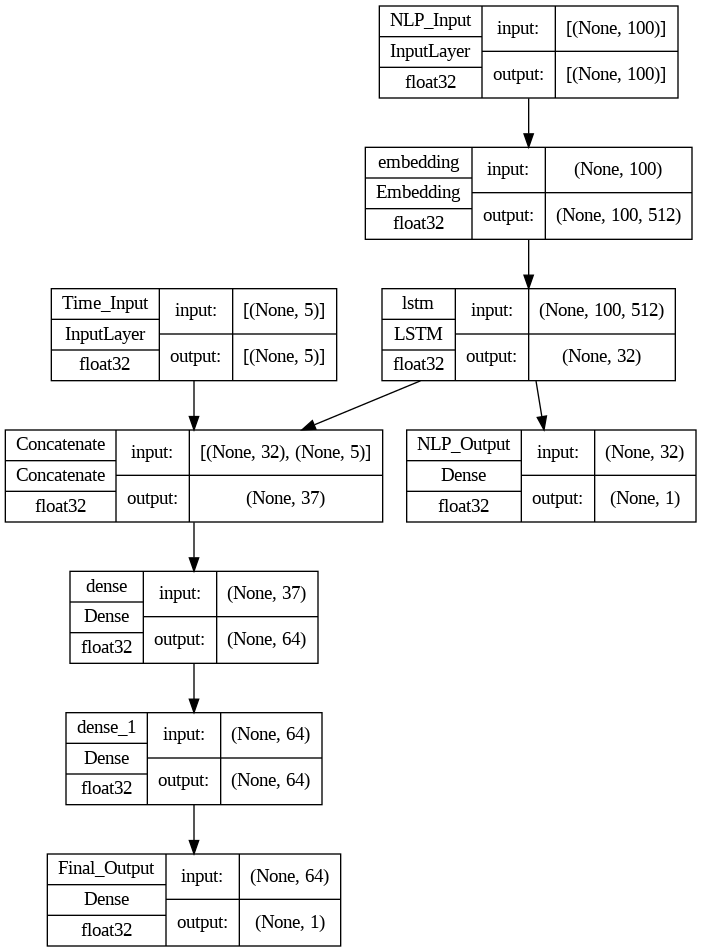

In [ ]:
from tensorflow.keras import utils

utils.plot_model(model,
                 show_shapes = True,
                 show_dtype = True)

> ## 9) Model Compile

In [ ]:
model.compile(loss = {'NLP_Output': 'binary_crossentropy',
                      'Final_Output': 'binary_crossentropy'},
              loss_weights = {'NLP_Output': 0.3,
                              'Final_Output': 1.0},
              optimizer = {'NLP_Output': 'rmsprop',
                           'Final_Output': 'adam'})

> ## 10) Model Fit

In [ ]:
# model.fit({'NLP_input': NLP_data,
#            'Time_input': Time_data},
#           {'Output_NLP': NLP_labels,
#            'Output_Final': Final_labels},
#           epochs = 50,
#           batch_size = 32)

# II. GoogleNet

> ## InceptionNet_22_Layers

* 2014 ILSVC 우승
 - Inception Module: 가로방향 구조

> ## 1) Model Define

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Concatenate
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

inputs = Input(shape = (224, 224, 3))

x_1 = Conv2D(32, (1, 1), activation = 'relu')(inputs)

x_2 = Conv2D(48, (1, 1), activation = 'relu')(inputs)
x_2 = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x_2)

x_3 = Conv2D(16, (1, 1), activation = 'relu')(inputs)
x_3 = Conv2D(16, (5, 5), activation = 'relu', padding = 'same')(x_3)

x_4 = MaxPooling2D(pool_size = (3, 3), strides = 1, padding = 'same')(inputs)
x_4 = Conv2D(32, (1, 1), activation = 'relu')(x_4)

output = Concatenate()([x_1, x_2, x_3, x_4])

model = Model(inputs = inputs, outputs = output)

> ## 2) Visualization

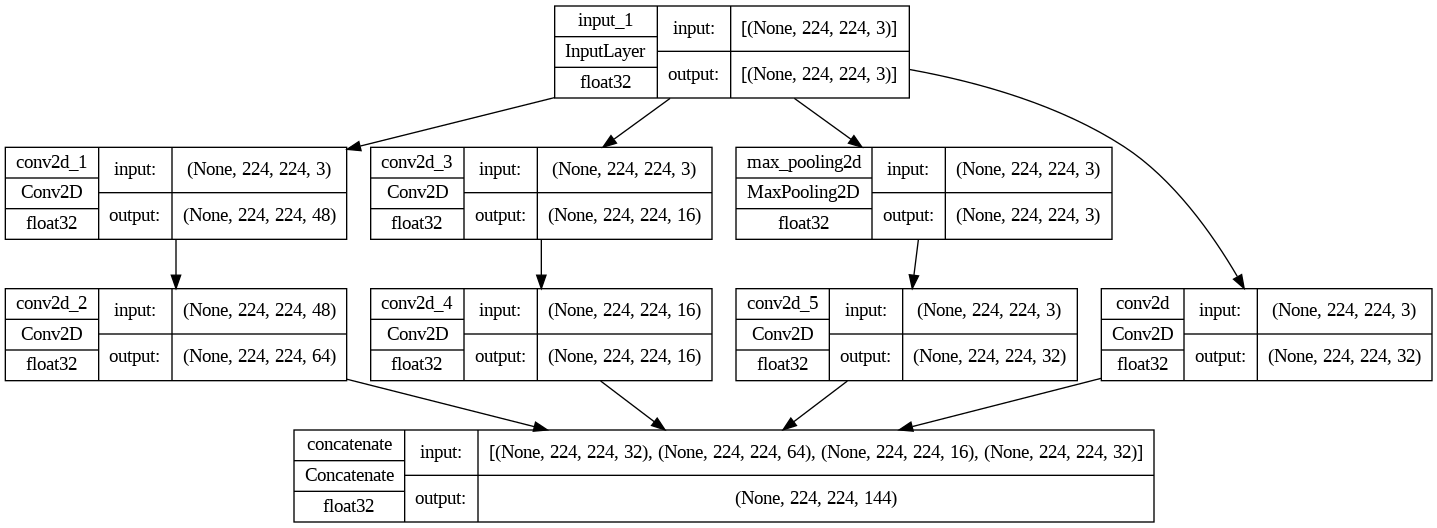

In [ ]:
from tensorflow.keras import utils

utils.plot_model(model,
                 show_shapes = True,
                 show_dtype = True)

# III. ResNet

> ## ResNet_152_Layers

* 2015 ILSVC 우승
 - Skip Connection: 이전 Layer의 Output을 뒤쪽 Layer로 전달

> ## 1) Model Define

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Add
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

def residual_block(inputs, num_channels, use_transform = False):
    x = Conv2D(num_channels, (3, 3), activation = 'relu', padding = 'same')(inputs)
    x = Conv2D(num_channels, (3, 3), padding = 'same')(x)

    if use_transform:
        x = MaxPooling2D(strides = 2)(x)
        inputs = Conv2D(num_channels, (1, 1), strides = 2, padding = 'same')(inputs)

    add_x = Add()([inputs, x])

    return Activation('relu')(add_x)

inputs = Input(shape = (224, 224, 1))

x = residual_block(inputs, 32, use_transform = True)
x = residual_block(x, 32)
x = residual_block(x, 32, use_transform = True)

x = Flatten()(x)
x = Dense(1000, activation = 'softmax')(x)

model = Model(inputs = inputs, outputs = x)

> ## 2) Visualization

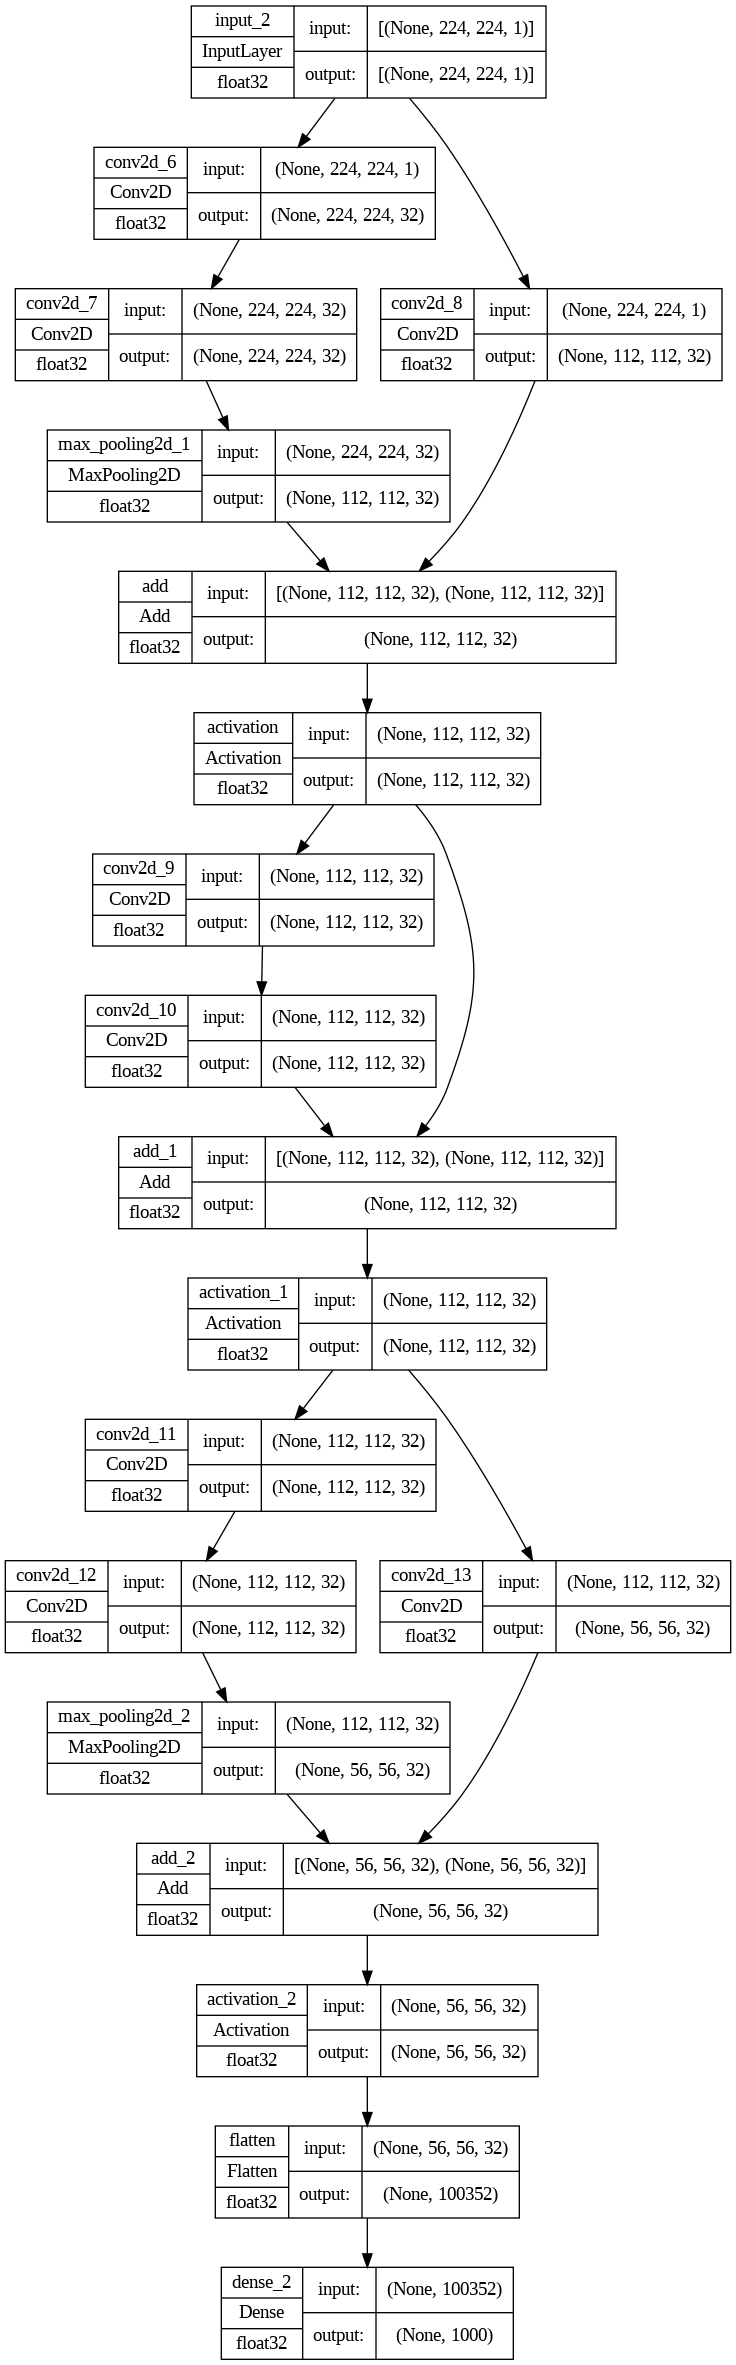

In [ ]:
from tensorflow.keras import utils

utils.plot_model(model,
                 show_shapes = True,
                 show_dtype = True)

# The End